In [1]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import os
import shutil

import representation
import kex_data
import kex_headers
import listmode
import petlink
import position
import e7tools

In [2]:
limo = kex_data.get_listmode()

In [4]:
sino_shape = kex_headers.HISTOGRAM_SHAPE
sinograms = {k: listmode.get_sinogram(v, shape=sino_shape).astype('uint16') for k,v in limo.items()}

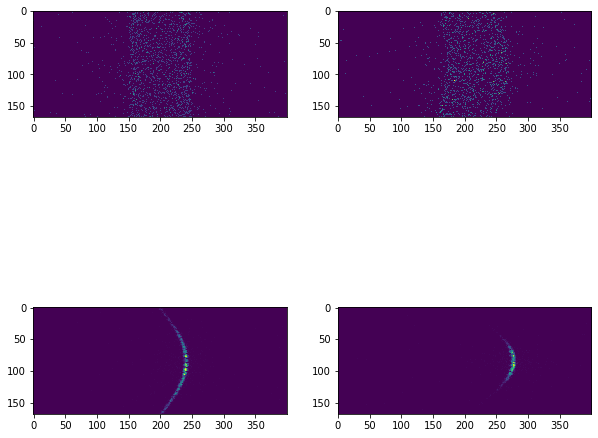

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axes = dict(zip(dkeys, axes.flatten()))
for dkey, ax in axes.items():
    tof = 0
    mi = 50
    ax.imshow(sinograms[dkey][tof,mi])
plt.show()

In [7]:
def prep_folder(dirname, filling):
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    for path in filling:
        shutil.copy(path, dirname, follow_symlinks=True)

In [8]:
for key in sinograms.keys():
    filling = [mhdr[key], hdr[key]]
    for k,f in enumerate(filling):
        filling[k] = folder[key] + "/" + f
    recon_dir = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon"
    prep_folder(recon_dir, filling)

In [9]:
#save to ref
ref = 0
for dkey, sino in sinograms.items():
    output_path = recon_dir + "/" + sfile[dkey]
    print(output_path)
    with open(output_path, 'wb') as file:
        file.write(sino.astype('uint16'))

C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/CylinderPET-LM-00-sino-0.s
C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/CylinderPET-LM-01-sino-0.s
C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/KanylPET-LM-00-sino-0.s
C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/KanylPET-LM-01-sino-0.s


In [10]:
for dkey in sinograms:
    output_path = recon_dir + "/" + mhdr[dkey]
    image_path = recon_dir + "/"+ dkey.replace(" ", "")
    npath = kex_data.NORM_PATH
    print("e", output_path, "\nn",npath  , "\noi", image_path)
    e7tools.recon(output_path, npath, image_path)

e C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/CylinderPET-LM-00-sino.mhdr 
n C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n.hdr 
oi C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/cylinder0
stdout
 b''
stderr
 b''
e C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/CylinderPET-LM-01-sino.mhdr 
n C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n.hdr 
oi C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/cylinder1
stdout
 b''
stderr
 b''
e C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/KanylPET-LM-00-sino.mhdr 
n C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n.hdr 
oi C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/cannula0
stdout
 b''
stderr
 b''
e C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/KanylPET-LM-01-sino.mhdr 
n C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n.hdr 
oi C:/Users/petct/Desktop/Hugo/Code/PythonMEX/limo_e7_recon/cannula1
stdout
 b''
stderr
 b''


In [11]:
vfile = []
with os.scandir(recon_dir) as it:
    for entry in it:
        if entry.is_file() and entry.name.endswith('.v'):
            print("v file", entry.name)
            vfile.append(entry.name)
vfile = dict(zip(kex_data.DATA_KEYS, vfile[2:]+vfile[:2]))

v file cannula0_000_000.v
v file cannula1_000_000.v
v file cylinder0_000_000.v
v file cylinder1_000_000.v


In [12]:
def get_v_data(path, shape=(109,200,200),dtype=np.float32):
    count = np.prod(shape)
    with open(path, 'rb') as file:
        img = np.fromfile(file, dtype=dtype, count=count)
    return np.reshape(img, newshape=shape)

In [13]:
my_recon = {k: get_v_data(recon_dir+"/"+v) for k,v in vfile.items()}

In [14]:
print(my_recon.keys())

dict_keys(['cylinder 0', 'cylinder 1', 'cannula 0', 'cannula 1'])


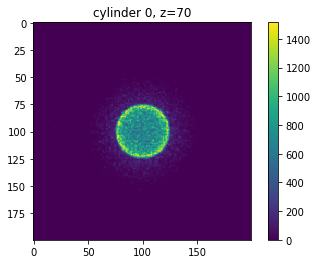

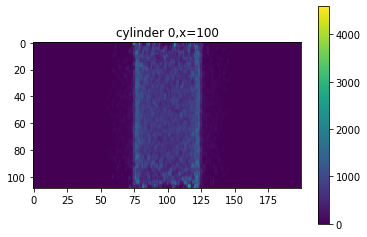

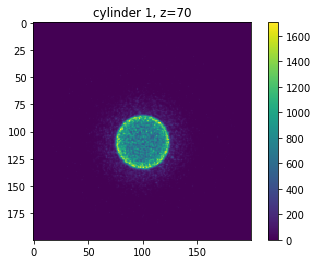

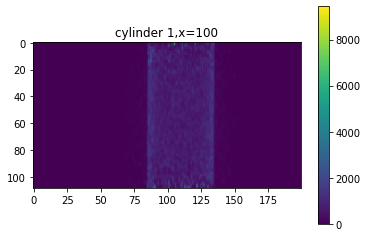

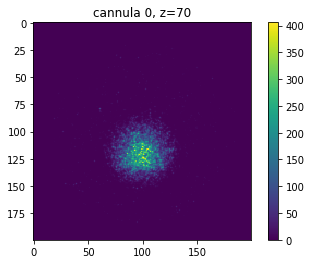

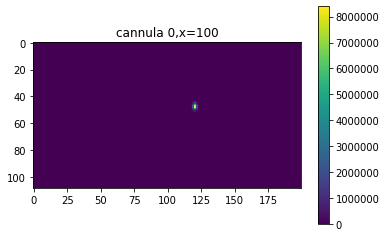

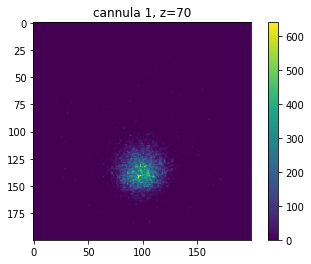

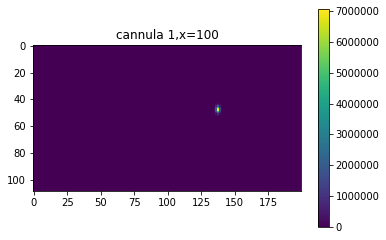

In [15]:
for dkey, img in my_recon.items():
    z=70
    plt.imshow(img[z])
    plt.colorbar()
    plt.title(dkey +", z={}".format(z))
    plt.show()
    x=100
    plt.imshow(img[:,:,x])
    plt.colorbar()
    plt.title(dkey + ",x={}".format(x))
    plt.show() 

In [16]:
my_recon = {k: get_v_data(recon_dir+"/"+v) for k,v in vfile.items()}

In [30]:
vpaths = {}
for key, path in sinogram_paths.items():
    folder = "/".join(path.split("/")[:-1])
    print("folder", folder)
    with os.scandir(folder) as it:
        for entry in it:
            if entry.is_file() and entry.name.endswith("OPTOF_000_000.v"):
                print("v file", entry.name)
                vpaths[key] = folder + "/" + entry.name
print("vpaths", vpaths)

folder C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00
v file CylinderPET-LM-00-OPTOF_000_000.v
folder C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-01
v file CylinderPET-LM-01-OPTOF_000_000.v
folder C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00
v file KanylPET-LM-00-OPTOF_000_000.v
folder C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-01
v file KanylPET-LM-01-OPTOF_000_000.v
vpaths {'cylinder 0': 'C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00/CylinderPET-LM-00-OPTOF_000_000.v', 'cylinder 1': 'C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-01/CylinderPET-LM-01-OPTOF_000_000.v', 'cannula 0': 'C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/KanylPET-LM-00-OPTOF_000_000.v', 'cannula 1': 'C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-01/KanylPET-LM-01-OPTOF_000_000.v'}


In [34]:
ref_recon = {k: get_v_data(v) for k,v in vpaths.items()}

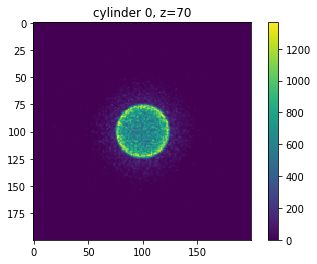

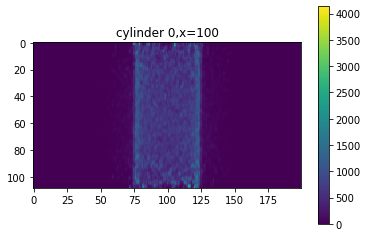

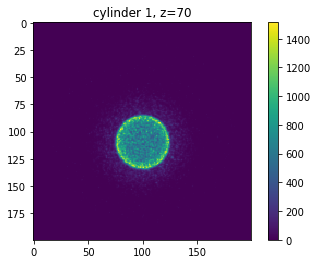

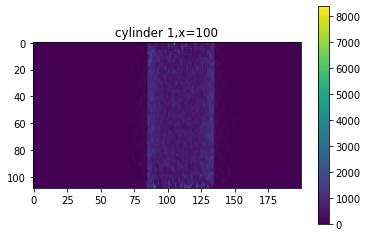

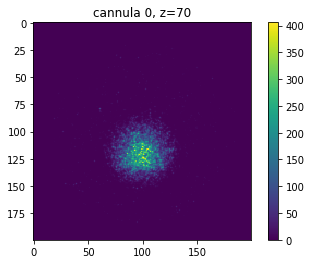

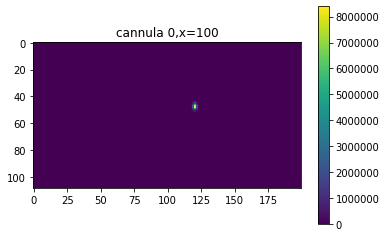

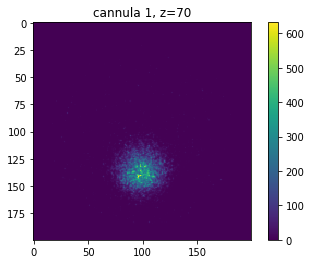

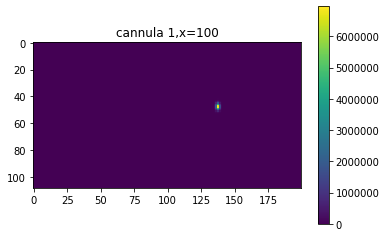

In [35]:
for dkey, img in ref_recon.items():
    z=70
    plt.imshow(img[z])
    plt.colorbar()
    plt.title(dkey +", z={}".format(z))
    plt.show()
    x=100
    plt.imshow(img[:,:,x])
    plt.colorbar()
    plt.title(dkey + ",x={}".format(x))
    plt.show() 

In [20]:
dicom_recon = kex_data.get_recon()

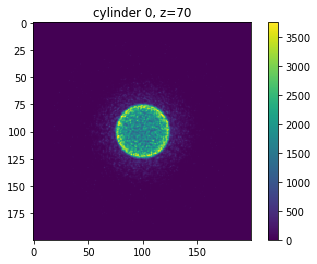

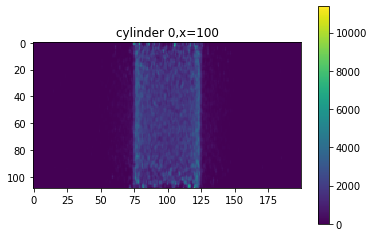

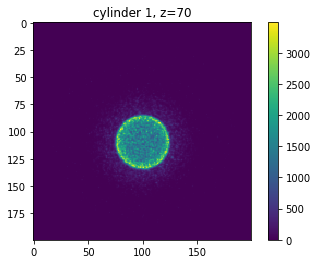

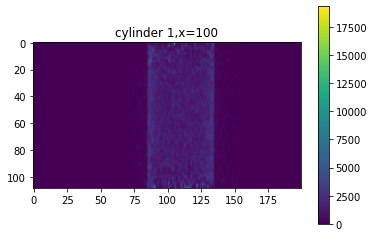

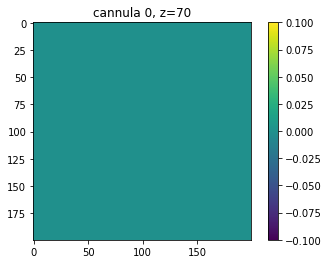

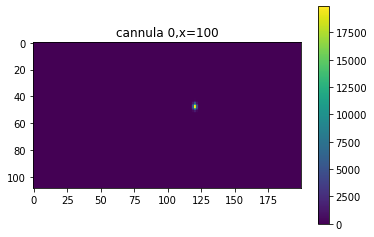

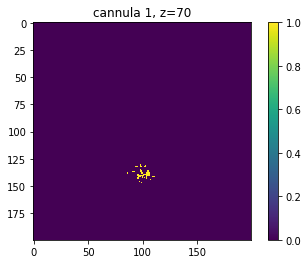

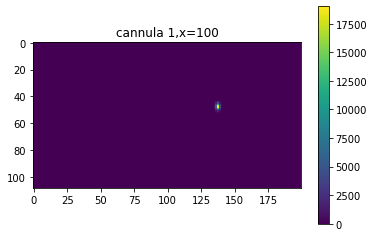

In [21]:
for dkey, img in dicom_recon.items():
    z=70
    plt.imshow(img[z])
    plt.colorbar()
    plt.title(dkey +", z={}".format(z))
    plt.show()
    x=100
    plt.imshow(img[:,:,x])
    plt.colorbar()
    plt.title(dkey + ",x={}".format(x))
    plt.show() 

In [22]:
ref_sinograms = kex_data.get_sinograms()

scan: cylinder 0
diff sum: 0.0
diff count: 0


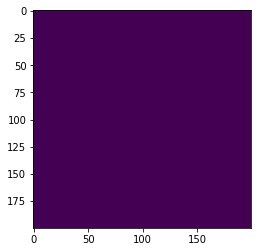

scan: cylinder 1
diff sum: 0.0
diff count: 0


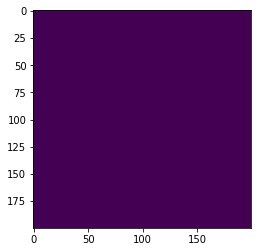

scan: cannula 0
diff sum: 0.0
diff count: 0


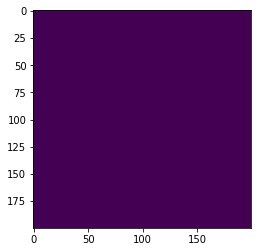

scan: cannula 1
diff sum: 0.0
diff count: 0


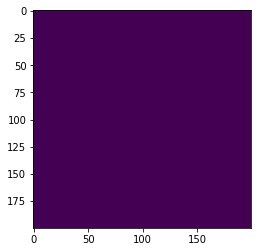

In [33]:
for dkey in ref_recon:
    diff = my_recon[dkey] - ref_recon[dkey] 
    print("scan:", dkey)
    print("diff sum:", np.sum(diff))
    print("diff count:", np.sum(diff != 0))
    plt.imshow(diff[50])
    plt.show()

In [24]:
for dkey in ref_sinograms:
    diff= ref_sinograms[dkey] - sinograms[dkey]
    print("diff sum", np.sum(diff))

diff sum 0
diff sum 0
diff sum 0
diff sum 0


In [29]:
for dkey in mhdr:
    e = folder[dkey] + "/" + mhdr[dkey]
    oi = folder[dkey] + "/" + mhdr[dkey].replace("sino", "OPTOF")
    print("e", e)
    print("oi", oi)
    n = kex_data.NORM_PATH
    print("n", n)
    print("return code", e7tools.recon(e, n, oi, verbose=True))

e C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00/CylinderPET-LM-00-sino.mhdr
oi C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-00/CylinderPET-LM-00-OPTOF.mhdr
n C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n.hdr
stdout
 b''
stderr
 b"I 05/28/2020 08:34:11.003 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/28/2020 08:34:11.003 (UTC+01:00) Number of NUMA nodes: 1
I 05/28/2020 08:34:11.003 (UTC+01:00) Number of physical processor packages: 1
I 05/28/2020 08:34:11.003 (UTC+01:00) Number of processor cores: 4
I 05/28/2020 08:34:11.003 (UTC+01:00) Number of logical processors: 8
I 05/28/2020 08:34:11.003 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/28/2020 08:34:11.003 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/28/2020 08:34:11.003 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/28/2020 08:34:11.579 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/28/2020 08:

stdout
 b''
stderr
 b"I 05/28/2020 08:34:56.970 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/28/2020 08:34:56.970 (UTC+01:00) Number of NUMA nodes: 1
I 05/28/2020 08:34:56.970 (UTC+01:00) Number of physical processor packages: 1
I 05/28/2020 08:34:56.970 (UTC+01:00) Number of processor cores: 4
I 05/28/2020 08:34:56.970 (UTC+01:00) Number of logical processors: 8
I 05/28/2020 08:34:56.970 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/28/2020 08:34:56.970 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/28/2020 08:34:56.970 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/28/2020 08:34:57.259 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/28/2020 08:34:57.260 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/28/2020 08:34:57.260 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/28/2020 08:34:57.260 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/28/2020 08:34:57.260 (UTC+01:0

stdout
 b''
stderr
 b"I 05/28/2020 08:35:40.128 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/28/2020 08:35:40.128 (UTC+01:00) Number of NUMA nodes: 1
I 05/28/2020 08:35:40.128 (UTC+01:00) Number of physical processor packages: 1
I 05/28/2020 08:35:40.128 (UTC+01:00) Number of processor cores: 4
I 05/28/2020 08:35:40.128 (UTC+01:00) Number of logical processors: 8
I 05/28/2020 08:35:40.128 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/28/2020 08:35:40.128 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/28/2020 08:35:40.128 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/28/2020 08:35:40.392 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/28/2020 08:35:40.394 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/28/2020 08:35:40.394 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/28/2020 08:35:40.394 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/28/2020 08:35:40.394 (UTC+01:0

stdout
 b''
stderr
 b"I 05/28/2020 08:36:22.265 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/28/2020 08:36:22.265 (UTC+01:00) Number of NUMA nodes: 1
I 05/28/2020 08:36:22.265 (UTC+01:00) Number of physical processor packages: 1
I 05/28/2020 08:36:22.265 (UTC+01:00) Number of processor cores: 4
I 05/28/2020 08:36:22.265 (UTC+01:00) Number of logical processors: 8
I 05/28/2020 08:36:22.265 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/28/2020 08:36:22.265 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/28/2020 08:36:22.265 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/28/2020 08:36:22.581 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/28/2020 08:36:22.581 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/28/2020 08:36:22.582 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/28/2020 08:36:22.582 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/28/2020 08:36:22.582 (UTC+01:0